# Cluster Analysis in Python

---

***Descripción del curso*** 

---

Probablemente se haya encontrado con Google News, que agrupa automáticamente artículos de noticias similares bajo un tema. ¿Alguna vez te has preguntado qué proceso se ejecuta en segundo plano para llegar a estos grupos? En este curso, se le presentará el aprendizaje no supervisado mediante la agrupación en clústeres utilizando la biblioteca SciPy en Python. Este curso cubre el preprocesamiento de datos y la aplicación de agrupaciones jerárquicas y de k-medias. A lo largo del curso, explorarás las estadísticas de los jugadores de un popular videojuego de fútbol, FIFA 18. Después de completar el curso, podrás aplicar rápidamente varios algoritmos de agrupamiento en los datos, visualizar los grupos formados y analizar los resultados.

## 1. Introduction to Clustering
**(Introducción a la agrupación en clústeres)**

Antes de que esté listo para clasificar artículos de noticias, debe conocer los conceptos básicos de la agrupación en clústeres. Este capítulo le familiariza con una clase de algoritmos de aprendizaje automático denominados aprendizaje no supervisado y luego le presenta la agrupación en clústeres, uno de los algoritmos de aprendizaje no supervisado más populares. Conocerá dos técnicas populares de agrupación en clústeres: agrupación jerárquica y agrupación de k-medias. El capítulo concluye con los pasos básicos de preprocesamiento antes de comenzar a agrupar los datos.

In [ ]:
# Los algoritmos no supervisados mas comunes
# clustering, neural networks, anomaly detection

# cluster
# Grupo de datos con caracteristicas similares

# Otros metodos cluster
# DBSCAN, Gaussian Methods

In [ ]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

In [ ]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

**Data preparation for cluster analysis**

In [ ]:
# NORMALIZACION 
# Es un proceso por el cual reescalamos los valores de una variable
#     con respecto a la desviación estandar de los datos

In [ ]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


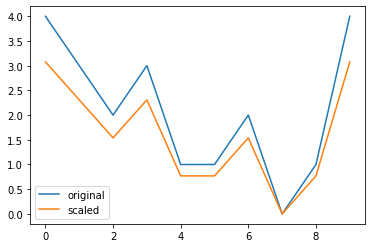

In [ ]:
from matplotlib import pyplot as plt

# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

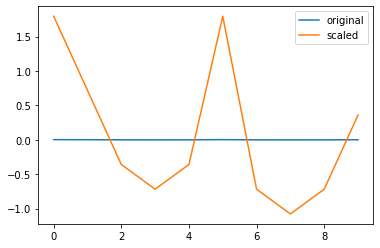

In [ ]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

FIFA 18 es un videojuego de fútbol que se lanzó en 2017 para PC y consolas. El conjunto de datos en el que está a punto de trabajar contiene datos sobre los 1000 mejores jugadores individuales del juego

En este ejercicio, trabajará con dos columnas, eur_wage, el salario de un jugador en euros y eur_value, su valor actual de mercado de transferencias.

In [ ]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

## 2. Hierarchical Clustering
**(Agrupación jerárquica)**

Este capítulo se centra en un algoritmo de agrupamiento en clústeres popular, el agrupamiento jerárquico, y su implementación en SciPy. Además del procedimiento para realizar agrupaciones jerárquicas, intenta ayudarlo a responder una pregunta importante: ¿cuántas agrupaciones están presentes en sus datos? El capítulo concluye con una discusión sobre las limitaciones de la agrupación jerárquica y analiza las consideraciones al utilizar la agrupación jerárquica.

In [ ]:
# CENTRALIZAR AGRUPACIONES JERARQUICAS CON SCIPY
# Calcular la matriz de distancia

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [ ]:
# Import the pyplot class
from matplotlib import pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

In [ ]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

DENDOGRAMA

In [ ]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram 

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

In [ ]:
% timeit suma ([1, 3, 2])

In [ ]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

In [ ]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

## 3. K-Means Clustering
**(Agrupación de K-medias)**

Este capítulo presenta un algoritmo de agrupación en clústeres diferente (k-means clustering) y su implementación en SciPy. El agrupamiento de K-medias supera el mayor inconveniente del agrupamiento jerárquico que se discutió en el último capítulo. Como los dendrogramas son específicos de la agrupación jerárquica, este capítulo analiza un método para encontrar el número de agrupaciones antes de ejecutar la agrupación k-means. El capítulo concluye con una discusión sobre las limitaciones de la agrupación en clústeres de k-medias y analiza las consideraciones al utilizar este algoritmo.

**Basics of k-means clustering**

In [ ]:
# AGRUPAMIENTO DE K-MEANS

In [ ]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']],cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [ ]:
%timeit kmeans(fifa[['scaled_sliding_tackle','scaled_aggression']],3)

**Método del codo en grupos distintos**

Elbow method on distinct clusters

In [ ]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion =  kmeans(comic_con[['x_scaled','y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [ ]:
# DATA UNIFORME
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Limitations of k-means clustering**

In [ ]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [ ]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

## 4. Clustering in Real World
**(Agrupación en el mundo real)**

Ahora que está familiarizado con dos de las técnicas de agrupamiento en clústeres más populares, este capítulo le ayudará a aplicar este conocimiento a problemas del mundo real. El capítulo primero analiza el proceso de encontrar colores dominantes en una imagen, antes de pasar al problema discutido en la introducción: la agrupación de artículos de noticias. El capítulo concluye con una discusión sobre la agrupación con múltiples variables, lo que dificulta la visualización de todos los datos.

In [ ]:
# Dominant colors in images

In [ ]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [ ]:
import seaborn as sns
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [ ]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

**Document clustering**

In [ ]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75,min_df=0.1, 
max_features=50, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

In [ ]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[3])

In [ ]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

In [ ]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

In [ ]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])